In [28]:
import os
import re
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import accuracy_score

In [48]:
spam_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\spam'
testing_spam_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Testing_data\spam'
training_spam_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Training_data\spam'

os.makedirs(testing_spam_folder, exist_ok=True)
os.makedirs(training_spam_folder, exist_ok=True)

spam_files = os.listdir(spam_folder)

random.shuffle(spam_files)

num_files = len(spam_files)
num_testing_files = int(num_files * 0.3)

for i, file in enumerate(spam_files):
    src_path = os.path.join(spam_folder, file)
    
    if i < num_testing_files:
        dest_path = os.path.join(testing_spam_folder, file)
    else:
        dest_path = os.path.join(training_spam_folder, file)
    
    shutil.copy(src_path, dest_path)


ham_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\ham'
testing_ham_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Testing_data\ham'
training_ham_folder = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Training_data\ham'

os.makedirs(testing_ham_folder, exist_ok=True)
os.makedirs(training_ham_folder, exist_ok=True)

ham_files = os.listdir(ham_folder)

random.shuffle(ham_files)

num_files = len(ham_files)
num_testing_files = int(num_files * 0.3)

for i, file in enumerate(ham_files):
    src_path = os.path.join(ham_folder, file)
    
    if i < num_testing_files:
        dest_path = os.path.join(testing_ham_folder, file)
    else:
        dest_path = os.path.join(training_ham_folder, file)
    
    shutil.copy(src_path, dest_path)

In [31]:
spam = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\spam'
ham = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\ham'
spam_training_path = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Training_data\spam'
ham_training_path = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Training_data\ham'
spam_testing_path = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Testing_data\spam'
ham_testing_path = r'C:\Users\tmawa\Desktop\Semester6\Introducation to Artifical Intelligence\lab4\Testing_data\ham'

In [32]:
def get_words(file_path):
    with open(file_path, 'r', encoding='latin-1') as file:
        content = file.read()
        words = re.findall(r'\b\w[\w!@$&]*\b', content)
    return words

def get_words_from_files(folder_path):
    words_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        words_list.extend(get_words(file_path))
    return words_list

def calculate_spamicity(word_counts, total_spam_words, total_ham_words):
    spamicity_list = []
    for word, counts in word_counts.items():
        p_spam_word = counts['spam'] / total_spam_words
        p_ham_word = counts['ham'] / total_ham_words
        spamicity = p_spam_word / (p_spam_word + p_ham_word)
        spamicity_list.append([word, counts['spam'], counts['ham'], spamicity])
    return spamicity_list

def save_spamicity_to_csv(spamicity_list, file_path):
    df = pd.DataFrame(spamicity_list, columns=['Word', 'Spam Count', 'Ham Count', 'Spamicity'])
    df.to_csv(file_path, index=False)

In [84]:
def train(spam_path, ham_path, type):
    print(f"{' '*30}{'*'*20}{type} data{'*'*20}\n\n")

    spam_words = get_words_from_files(spam_path)
    ham_words = get_words_from_files(ham_path)

    num_spam_files = len(os.listdir(spam_path))
    num_ham_files = len(os.listdir(ham_path))

    print(f"Number of SPAM files: {num_spam_files}")
    print(f"Number of HAM files: {num_ham_files}")

    total_spam_words = len(spam_words)
    total_ham_words = len(ham_words)

    print('Total spam words:', total_spam_words)
    print('Total ham words:', total_ham_words)

    word_counts = defaultdict(lambda: {'spam': 0, 'ham': 0})
    for word in spam_words:
        word_counts[word]['spam'] += 1
    for word in ham_words:
        word_counts[word]['ham'] += 1


    csv_name = f'{type}_spamicity.csv'
    spamicity_list = calculate_spamicity(word_counts, total_spam_words, total_ham_words)
    save_spamicity_to_csv(spamicity_list, csv_name)

    spamicity_df = pd.read_csv(csv_name)

    print('Spamicity calculation completed.')

    print("Total number of spam words:", total_spam_words)
    print("Total number of ham words:", total_ham_words)


    new_file = 'Earn m0ney zzz.'
    filename = 'new_file.txt'
    with open(filename, 'w', encoding='latin-1') as f:
        f.write(new_file)

    new_file_path = 'new_file.txt'
    new_words = get_words(new_file_path)
    new_words_spamicity = spamicity_df.loc[spamicity_df['Word'].isin(new_words), 'Spamicity']

    # print("\nSpamicity values for new words:")
    # print(new_words_spamicity)

    N = [8,16, 32]

    for n in N:
        closest_to_mean = (new_words_spamicity - new_words_spamicity.mean()).abs().nsmallest(n)
        selected_spamicity = new_words_spamicity.loc[closest_to_mean.index]
        p = np.prod(selected_spamicity)
        pc = np.prod(1 - selected_spamicity)
        spamicity = p / (p + pc)

        print("\nN:", n)
        print("Spamicity of the new file:", spamicity)
        print("Is the new file spam?", "Yes" if spamicity > 0.5 else "No")

    def plot_spamicity(spamicity_df, word=""):
        plt.title(f'Spamicity plot')
        plt.xlabel('Spamicity')
        plt.ylabel('Frequency')
        plt.hist(spamicity_df['Spamicity'], bins=30, color='blue', edgecolor='black')
        plt.show()

    plot_spamicity(spamicity_df, 'earn')

    def plot_spam_ham_counts(spamicity_df, n):
        top_n_words = spamicity_df.sort_values(by='Spam Count', ascending=False).head(n)['Word']
        top_n_words_spamicity = spamicity_df.loc[spamicity_df['Word'].isin(top_n_words), ['Word', 'Spam Count', 'Ham Count']]
        top_n_words_spamicity.set_index('Word', inplace=True)
        top_n_words_spamicity.plot.bar()
        plt.title(f'Spam and Ham counts for top {n} words')
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.show()
    
    plot_spam_ham_counts(spamicity_df, 10)

    def classify(filepath, spamicity_df, N):
        ss = spamicity_df.loc[spamicity_df['Word'].isin(get_words(filepath)), 'Spamicity'].nsmallest(N)
        return np.prod(ss) / (np.prod(1 - ss) + np.prod(ss)) > 0.5


    def test(spam_path, ham_path, spamicity_df, N):
        num_spam_correct = []
        num_ham_correct = []


        for filename in os.listdir(spam_path):
            filepath = os.path.join(spam_path, filename)
            isp = classify(filepath, spamicity_df, N)
            num_spam_correct.append(isp)
            num_ham_correct.append(True)

        for filename in os.listdir(ham_path):
            filepath = os.path.join(ham_path, filename)
            ish = classify(filepath, spamicity_df, N)
            num_ham_correct.append(ish)
            num_spam_correct.append(False)


        num_spam_correct = np.array(num_spam_correct)
        num_ham_correct = np.array(num_ham_correct)

        false_positive = np.sum((num_spam_correct == True)&(num_ham_correct == False))
        false_negative = (N-np.sum((num_spam_correct == False)|(num_ham_correct == True)))*2
        accuracy = 1 - accuracy_score(num_ham_correct, num_spam_correct)

        print(f'False positive: {false_positive}')
        print(f'False negative: {false_negative}')
        print(f'Accuracy: {accuracy}')

    
    test(spam_testing_path, ham_testing_path, spamicity_df, 8)
    

In [ ]:
train(spam_training_path, ham_training_path, 'training')

                              ********************testing data********************


Number of SPAM files: 5
Number of HAM files: 2
Total spam words: 5051
Total ham words: 7779
Spamicity calculation completed.
Total number of spam words: 5051
Total number of ham words: 7779

N: 8
Spamicity of the new file: 0.5
Is the new file spam? No

N: 16
Spamicity of the new file: 0.5
Is the new file spam? No

N: 32
Spamicity of the new file: 0.5
Is the new file spam? No


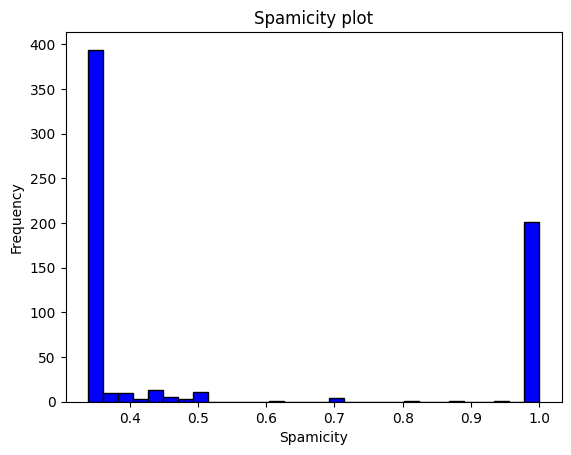

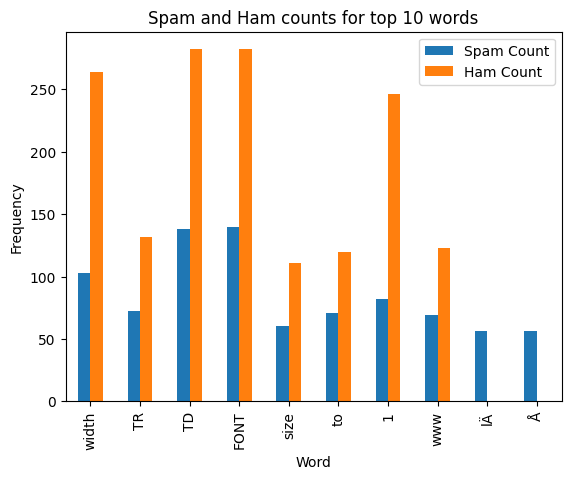

False positive: 0
False negative: 2
Accuracy: 0.2857142857142857


In [85]:
train(spam_testing_path, ham_testing_path, 'testing')